# Task-1 Iris Flower Classification


# Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.linear_model import  LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_validate
from sklearn.feature_selection import RFE


In [3]:
df=pd.read_csv("IRIS.csv")


In [4]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [5]:
df.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [6]:
df_describe=df.describe()
df_describe.head(20)

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


<AxesSubplot:xlabel='species', ylabel='Count'>

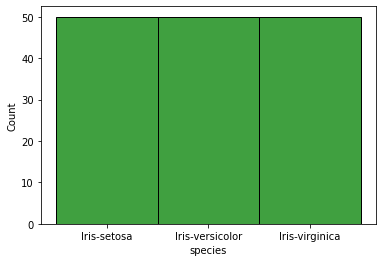

In [7]:
sns.histplot(df, x="species", color="green")

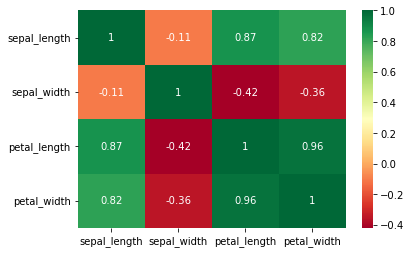

In [8]:
hm=sns.heatmap(df.corr(), annot=True, cmap="RdYlGn")

Text(336.9714285714286, 0.5, 'petal length')

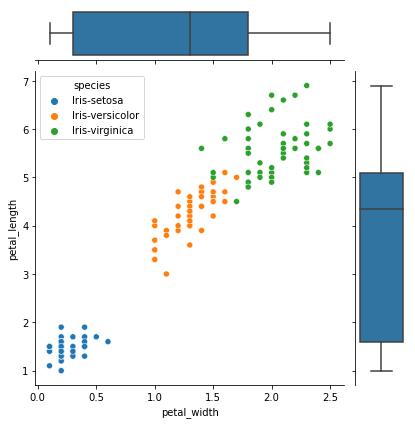

In [9]:
sns.JointGrid(data=df,  x='petal_width',y='petal_length', hue="species").plot_joint(sns.scatterplot).plot_marginals(sns.boxplot)
plt.xlabel('petal width')
plt.ylabel('petal length')

Text(336.9714285714286, 0.5, 'sepal length')

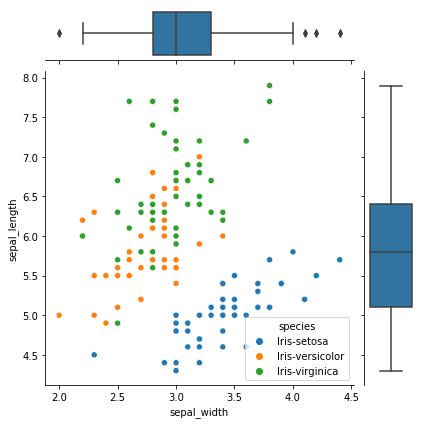

In [10]:
sns.JointGrid(data=df,  x='sepal_width',y='sepal_length', hue="species").plot_joint(sns.scatterplot).plot_marginals(sns.boxplot)
plt.xlabel('sepal width')
plt.ylabel('sepal length')

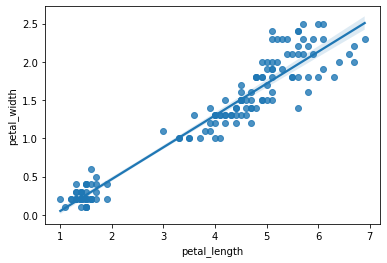

In [12]:
fig4=sns.regplot(data=df, x="petal_length", y="petal_width")

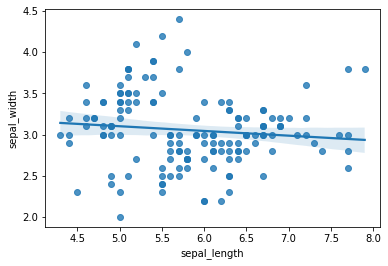

In [13]:
fig3=sns.regplot(data=df, x="sepal_length", y="sepal_width")

In [14]:
y=df["species"]
x=df.drop(columns="species")

In [15]:
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: species, Length: 150, dtype: object

In [16]:
x

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [17]:
x=MinMaxScaler().fit_transform(x)
pd.DataFrame(x).head(10)

,0,1,2,3
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667
5,0.305556,0.791667,0.118644,0.125000
6,0.083333,0.583333,0.067797,0.083333
7,0.194444,0.583333,0.084746,0.041667
8,0.027778,0.375000,0.067797,0.041667
9,0.166667,0.458333,0.084746,0.000000


In [18]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=2)

In [20]:
model=LogisticRegression().fit(x_train,y_train)
predict=model.predict(x_test)
predict_proba=model.predict_proba(x_test)



In [21]:
pd.DataFrame(predict).head(10)

,0
0,Iris-setosa
1,Iris-setosa
2,Iris-virginica
3,Iris-setosa
4,Iris-setosa
5,Iris-virginica
6,Iris-setosa
7,Iris-virginica
8,Iris-virginica
9,Iris-setosa


In [22]:
pd.DataFrame(predict_proba).head(10)

,0,1,2
0,0.856945,0.136544,0.006511
1,0.811193,0.182297,0.006510
2,0.022324,0.429706,0.547970
3,0.802331,0.191946,0.005723
4,0.824687,0.166874,0.008439
5,0.018690,0.349663,0.631647
6,0.756684,0.234293,0.009023
7,0.011014,0.383566,0.605420
8,0.011237,0.280784,0.707979
9,0.772251,0.219043,0.008706


In [23]:
accuracy= accuracy_score(predict, y_test)
precision=precision_score(predict, y_test, average="macro")
recall=recall_score(predict, y_test, average="macro")
f1score=f1_score(predict, y_test, average="macro")



In [24]:
scores={"accuracy":accuracy, precision:"precision", "recall":recall, "f1score":f1score}
print(scores)

{'accuracy': 0.9333333333333333, 0.9166666666666666: 'precision', 'recall': 0.9333333333333332, 'f1score': 0.9153439153439153}


In [25]:
cross_valid=cross_validate(LogisticRegression(),x,y,scoring="f1_macro", cv=5)
print(cross_valid["test_score"], "\n",cross_valid["test_score"].mean())

[0.82949702 0.96658312 0.93265993 0.89974937 1.        ] 
 0.9256978893538322


In [26]:
rfe=RFE(LogisticRegression(),n_features_to_select=2)
rfe.fit(x,y)


RFE(estimator=LogisticRegression(), n_features_to_select=2)

In [27]:
ranking=rfe.ranking_
feature_names=list(df.iloc[0:3].columns)
feature_ranks=dict(zip(feature_names,ranking))


In [29]:
print(feature_ranks)


{'sepal_length': 3, 'sepal_width': 2, 'petal_length': 1, 'petal_width': 1}
